# MAJOR PROJECT 

USING TWITTER INFORMATION DATASET

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot 
%matplotlib inline  
matplotlib.get_backend()
metadata = pd.read_csv("Information.csv",encoding='latin1')

In [2]:
metadata.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

# CLEANING OF DATA

In [43]:
data = pd.read_csv("C:\\Users\\Anushka\\Desktop\\Information.csv",usecols= [1,5,6,19,17,21,10,11],encoding='latin1')

In [4]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

In [5]:
data=data[data.gender != 'unknown']
data= data[data.gender != 'brand']
data.dropna(inplace=True)

In [6]:
data.shape

(11194, 9)

# EDA (Exploratory Data Analysis)

In [7]:
data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])
data['Description'] = data['Description'].str.lower().str.split()
data['Description'] = data['Description'].apply(lambda x : [item for item in x if item not in stop])

In [8]:
data.gender.value_counts()

female    5725
male      5469
Name: gender, dtype: int64

In [9]:
import re
import nltk as nlp
#from nltk.corpus import stopwords
lemma = nlp.WordNetLemmatizer()  
tweets_list = []            # empty list
for each in data.Tweets:
    each = re.sub("[^a-zA-Z]"," ", str(each))                                        # regex to clean unnecesarry chars
    each = each.lower()                                                              # lowercase all
    each = nlp.word_tokenize(each)                                                   # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words from your array
    each = [lemma.lemmatize(word) for word in each]                                  # lemmatize "memories" -> "memory"
    each = " ".join(each)                                                            # make them one string again
    tweets_list.append(each)

In [10]:
tweets_list

['robbie e responds critic win eddie edward worldtitleseries nsybbmvjkz',
 'felt like friend living story arngeyhno retired ian cizcanpqfz',
 'absolutely adore louis start song hit hard feel good',
 'hi jordanspieth looking url use ifttt typically see advanced user pgatour houpel',
 'watching neighbour sky catching neighbs xxx xxx',
 'ive seen people train lamp chair tv etc wzfpvmi',
 'gala bingo club bought uk largest high street bingo operator gala taken hzeeykjud',
 'aphmau pic defines mcd fangirls fanboys mcd shipper xd',
 'evielady lovely tree year never seen gorgeous autumn lour',
 'put as line repay',
 'even need sound effect diviner tonight',
 'giannaaa lmao dude hella scared next episode bc ending yesterday',
 'olyazzy ditto still learning favourite retweet stuff least suck le facebook haha p',
 'craftyear isabelpascual thank retweets',
 'girl went sleep guy sat floor watched u',
 'chrisaofficial right side xxx',
 'yall lmfaoo right chorus came tear rolled face ayuqdptvse',
 '

In [11]:
lemma = nlp.WordNetLemmatizer()  
description_list = []            # empty list
for each in data.Description:
    each = re.sub("[^a-zA-Z]"," ", str(each))                                        # regex to clean unnecesarry chars
    each = each.lower()                                                              # lowercase all
    each = nlp.word_tokenize(each)                                                   # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]    # delete stop words from your array
    each = [lemma.lemmatize(word) for word in each]                                  # lemmatize "memories" -> "memory"
    each = " ".join(each)                                                            # make them one string again
    description_list.append(each)

In [12]:
description_list

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial ffee soft spot renaissance china national teaching fellow',
 'senior xi xii mmxiv',
 'im p bo burnham disney world',
 'jmkm',
 'enthusiastic f fan model llector music fan film fanatic also aspergian',
 'artisan specializing paper mache print making fibre art art teacher cat devotee find page fb gbstgicv',
 'bled died take away sin',
 'union j xxxx',
 'start',
 'bsc enomics graduate y',
 'wife ach mom eight troop follower christ',
 'dm closed sc dearmoonshine',
 'rl writer lewd aspiring femboy enj

### Q1) What are the most common emotions/words used by Males and Females?

In [13]:
data['clean_text']=tweets_list
data['clean_description']=description_list
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']
Male_Words_ = pd.Series(' '.join(Male['clean_text'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words_ = pd.Series(' '.join(Female['clean_text'].astype(str)).lower().split(" ")).value_counts()[:20]

In [14]:
Female_Words_

like      396
get       328
one       320
day       319
love      317
go        266
time      254
people    221
make      202
u         201
know      196
want      188
got       184
amp       181
new       178
best      168
thing     162
need      150
good      148
back      146
dtype: int64

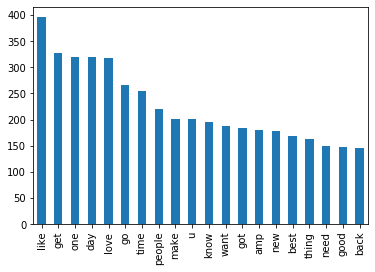

In [16]:
Female_Words_.plot(kind='bar',stacked=True)

In [17]:
Male_Words_

get       330
like      328
one       272
time      233
go        209
love      201
day       200
new       190
people    176
know      174
make      171
u         170
got       169
good      162
see       152
think     144
need      142
year      142
back      139
best      138
dtype: int64

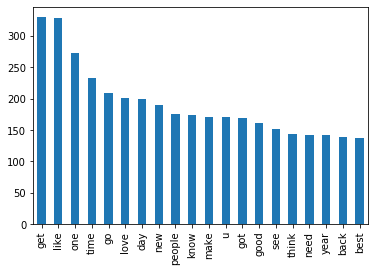

In [18]:
Male_Words_.plot(kind='bar',stacked=True)

# Visualisation with WordCloud

In [19]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap


In [20]:
#FOR TEXT

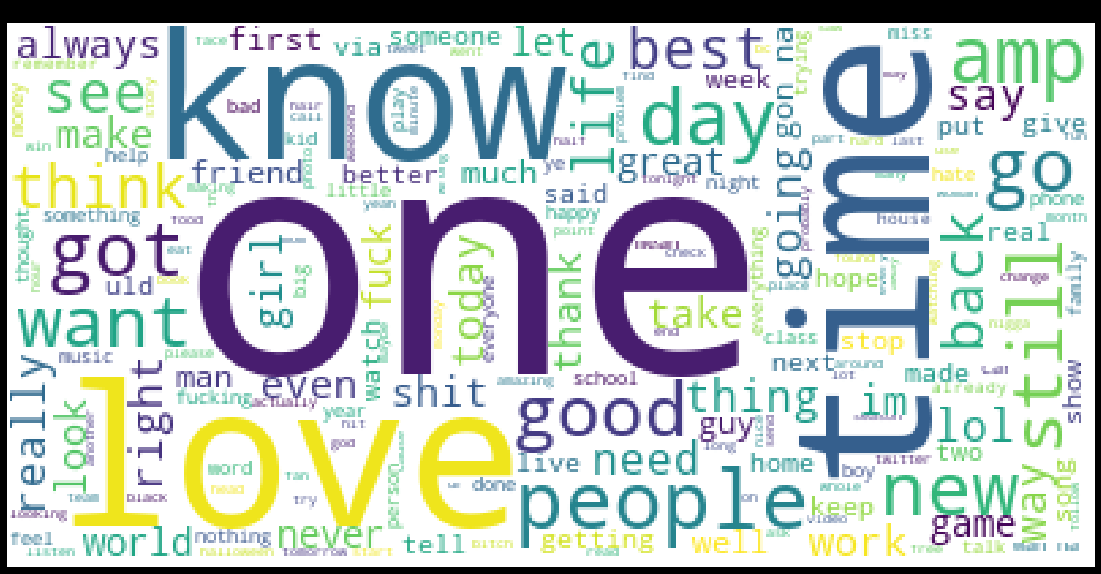

In [21]:
import matplotlib.pyplot as plt
def wordcloud(data,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in data[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
wordcloud(data,'clean_text')  

In [22]:
# FOR DESCRIPTION

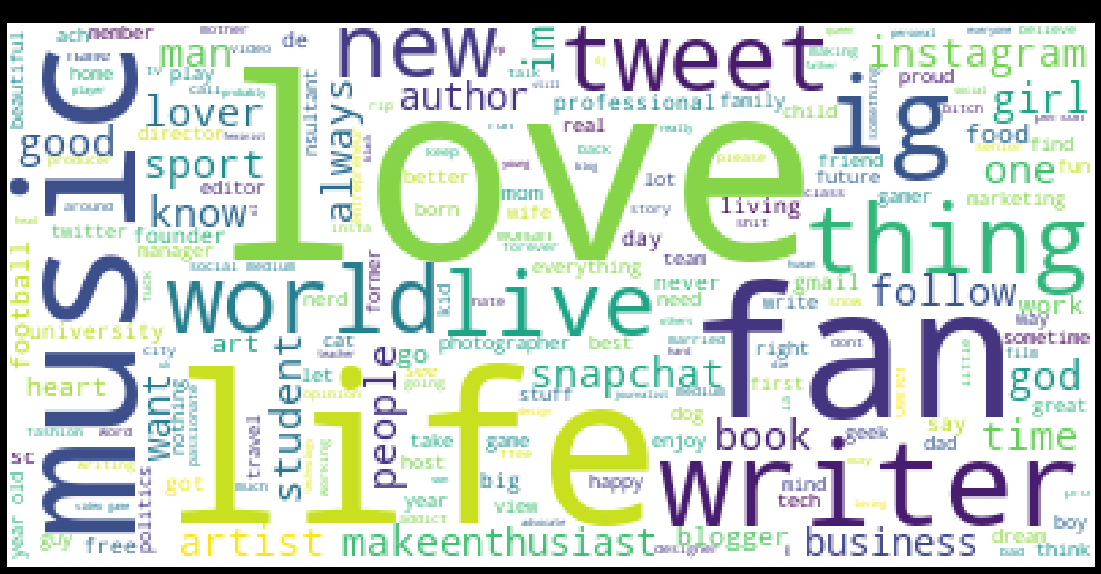

In [23]:
wordcloud(data,'clean_description') 

### Q2) Which gender makes more typos in their tweets?

In [25]:
Male_Words = pd.Series(' '.join(Male['clean_text'].astype(str)).lower().split(" ")).value_counts()[:]
Female_Words = pd.Series(' '.join(Female['clean_text'].astype(str)).lower().split(" ")).value_counts()[:]

In [54]:
from textblob import TextBlob 
  
a = Female_Words.index
count=0
# incorrect spelling 
for word in a: 
    b = TextBlob(word).correct()
#     print(b, word)
    if b != word:
        count += 1
print(count)

print(len(a))

 

3696
13649


In [69]:
from textblob import TextBlob 
  
a = Male_Words.index
count=0
# incorrect spelling 
for word in a: 
    b = TextBlob(word).correct()
#     print(b, word)
    if b != word:
        count += 1
print(count)

print(len(a))

4261
15265




# CLASSIFICATION ALGORITHM 

In [27]:
from collections import defaultdict

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# The Tree Model
from sklearn.tree import DecisionTreeClassifier
# The ensemble Model
from sklearn.ensemble import RandomForestClassifier
# function to split the data for cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
# function for encoding categories
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import LabelEncoder

In [28]:
data['text_norm'] = [cleaning(s) for s in data['clean_text']]
data['description_norm'] = [cleaning(s) for s in data['clean_description']]

# predicting  using text column only

In [29]:
data_confident = data[data['gender:confidence']>0.8]
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data_confident['text_norm'])
#vect = TfidfVectorizer()

#x = vect.fit_transform(data_confident['text_norm'])
encoder = LabelEncoder()
y = encoder.fit_transform(data_confident['gender'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7020, 20103)
(7020,)
(1755, 20103)
(1755,)


#### MULTINOMIALNB CLASSIFICATION ALGORITHM

In [34]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.5874643874643874

#### DECISION TREE CLASSIFIER CLASSIFICATION ALGORITHM

In [35]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
dec.score(x_test,y_test)

0.5247863247863248

#### RANDOM FOREST CLASSIFICATION ALGORITHM

In [36]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.5601139601139601

#### SUPPORT VECTOR CLASSIFIER

In [37]:
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.5863247863247864

### Accuracies for each CLASSIFICATION ALGORITHM in this case is as follows :

 - **MULTINOMIALNB** : 58.74% 
 - **DECISION TREE** : 52.47%
 - **RANDOM FOREST** : 56.01%   
 - **SVM** : 58.63%
 
Conclusion: **MULTINOMIALNB** model suits best for the given problem with **58.74%** accuracy.

# predicting using text and description column 

In [38]:
data['all_features'] = data['text_norm'].str.cat(data['description_norm'], sep=' ')

data_confident = data[data['gender:confidence']>0.8]
# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data_confident['all_features'])
#vect = TfidfVectorizer()

#x = vect.fit_transform(data_confident['text_norm'])
encoder = LabelEncoder()
y = encoder.fit_transform(data_confident['gender'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### MULTINOMIALNB CLASSIFICATION ALGORITHM

In [39]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6957264957264957

#### DECISION TREE CLASSIFIER CLASSIFICATION ALGORITHM

In [40]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
dec.score(x_test,y_test)

0.611965811965812

#### RANDOM FOREST CLASSIFICATION ALGORITHM



In [41]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.674074074074074

#### SUPPORT VECTOR CLASSIFIER

In [42]:
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.6564102564102564

In [ ]:
0.6957264957264957
DECISION TREE CLASSIFIER CLASSIFICATION ALGORITHM : 0.611965811965812
RANDOM FOREST CLASSIFICATION ALGORITHM : 0.674074074074074
SUPPORT VECTOR CLASSIFIER : 0.6564102564102564

### Accuracies for each CLASSIFICATION ALGORITHM in this case is as follows :

 - **MULTINOMIALNB** : 69.57% 
 - **DECISION TREE** :  61.19%
 - **RANDOM FOREST** : 67.40%   
 - **SVM** : 65.64%
 
Conclusion: **MULTINOMIALNB** model suits best for the given problem with **69.57%** accuracy.